# Traffic Count Data
Looking for what the safest neighborhood is, I found traffic data to be a good indicator.  
- Higher average traffic would mean a higher chance of accidents, so the less you have the safer you would be

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv("/Users/zanderhodgson/Downloads/6dfd4f8f-cbf5-4917-a5eb-fd07f4403167.csv")
df.head(90)

,_id,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,...,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
0,1,1011743669,85,1.445865e+09,2019-04-18,2019-04-26,4949.0,NaN,6,StatTrak,...,-79.967772,40.455733,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
1,2,1026101993,140,1.121444e+09,2019-01-24,NaN,NaN,NaN,NaN,Intersection Study,...,-79.952249,40.466157,Central Lawrenceville,7.0,9.0,42003090200,2.0,9.0,2.0,3-6
2,3,1032382575,11,1.539893e+09,2018-08-28,2018-09-04,NaN,NaN,NaN,NaN,...,-80.076469,40.460717,Windgap,2.0,28.0,42003563000,5.0,28.0,6.0,1-16
3,4,103627606,9,7.341951e+08,2018-07-17,2018-08-01,2741.0,NaN,NaN,StatTrak,...,-79.914335,40.437379,Squirrel Hill South,5.0,14.0,42003140800,3.0,14.0,4.0,2-18
4,5,1039546167,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-80.019211,40.490794,Perry North,1.0,26.0,42003260200,1.0,26.0,1.0,1-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,1910901085,211,1.129909e+09,2019-06-11,2019-06-11,NaN,954.0,Tuesday SPC video count,NaN,...,-79.961927,40.427062,South Side Flats,3.0,16.0,42003160900,3.0,16.0,3.0,4-24
86,87,1920331937,57,9.511532e+08,2019-01-24,2019-01-27,5151.0,NaN,NaN,StatTrak,...,-79.912685,40.460147,Larimer,9.0,12.0,42003120800,2.0,12.0,5.0,3-10
87,88,1922660255,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-79.912208,40.443207,Point Breeze,9.0,14.0,42003981100,3.0,14.0,4.0,2-18
88,89,1927765267,220,2.128887e+09,2019-12-12,2019-12-24,4550.0,NaN,3,StatTrak,...,-79.955468,40.449522,North Oakland,8.0,4.0,42003562000,3.0,4.0,4.0,2-7


In [38]:
counts = df["neighborhood"].value_counts()
counts.head(90)

neighborhood
Squirrel Hill South    28
Bloomfield             21
Shadyside              18
Highland Park          16
East Liberty           16
                       ..
Allegheny Center        1
Upper Lawrenceville     1
Duquesne Heights        1
Regent Square           1
Crawford-Roberts        1
Name: count, Length: 74, dtype: int64

Lots of multiple studies in the same neighborhoods with overlapping start and end dates, have to get rid of them to avoid including squirrel hill 28 times

In [39]:
cleaned = df.dropna(subset = ["average_daily_car_traffic"])
cleaned.head(90)

,_id,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,...,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
0,1,1011743669,85,1.445865e+09,2019-04-18,2019-04-26,4949.0,NaN,6,StatTrak,...,-79.967772,40.455733,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
3,4,103627606,9,7.341951e+08,2018-07-17,2018-08-01,2741.0,NaN,NaN,StatTrak,...,-79.914335,40.437379,Squirrel Hill South,5.0,14.0,42003140800,3.0,14.0,4.0,2-18
5,6,1041392556,76,5.713472e+08,2019-03-22,2019-03-29,1046.0,NaN,2,StatTrak,...,-80.014234,40.458106,Central Northside,6.0,25.0,42003250300,1.0,25.0,1.0,1-21
7,8,1053645660,87,8.042089e+08,2019-04-18,2019-04-26,3015.0,NaN,4,StatTrak,...,-79.964592,40.457119,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
10,11,1102260248,8,1.088318e+09,2018-07-16,2018-08-01,5592.0,NaN,NaN,StatTrak,...,-79.911925,40.435620,Squirrel Hill South,5.0,14.0,42003140800,3.0,14.0,4.0,2-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,138,428229895,25,8.457889e+08,2018-11-08,2018-11-14,382.0,NaN,NaN,StatTrak,...,-79.960275,40.439791,Central Oakland,6.0,4.0,42003040500,3.0,4.0,4.0,2-14
139,140,454488789,199,6.321491e+08,2019-11-04,2019-11-13,9600.0,NaN,4,StatTrak,...,-80.050706,40.433352,Westwood,2.0,28.0,42003563100,5.0,28.0,6.0,1-18
140,141,462461649,78,3.743645e+08,2019-03-22,2019-03-29,2386.0,NaN,4,StatTrak,...,-80.009269,40.451106,Allegheny Center,1.0,22.0,42003562700,1.0,22.0,1.0,1-7
141,142,495567113,105,1.458021e+09,2019-06-13,2019-06-20,1270.0,NaN,NaN,StatTrak,...,-79.937217,40.459574,Bloomfield,7.0,8.0,42003080600,2.0,8.0,5.0,3-23


In [40]:
cleanest = cleaned.drop_duplicates(subset = ["neighborhood"])
cleanest.head(90)

,_id,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,...,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
0,1,1011743669,85,1.445865e+09,2019-04-18,2019-04-26,4949.0,NaN,6,StatTrak,...,-79.967772,40.455733,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
3,4,103627606,9,7.341951e+08,2018-07-17,2018-08-01,2741.0,NaN,NaN,StatTrak,...,-79.914335,40.437379,Squirrel Hill South,5.0,14.0,42003140800,3.0,14.0,4.0,2-18
5,6,1041392556,76,5.713472e+08,2019-03-22,2019-03-29,1046.0,NaN,2,StatTrak,...,-80.014234,40.458106,Central Northside,6.0,25.0,42003250300,1.0,25.0,1.0,1-21
13,14,1130122192,65,1.341476e+09,2019-02-05,2019-02-14,1455.0,NaN,NaN,StatTrak,...,-79.979554,40.436482,Bluff,6.0,1.0,42003010300,3.0,1.0,2.0,2-1
14,15,115502120,176,1.215643e+09,2019-08-09,2019-08-19,11500.0,NaN,5,StatTrak,...,-80.052403,40.451926,Crafton Heights,2.0,20.0,42003281400,5.0,20.0,6.0,1-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,763,1844854594,337,3.703447e+07,2020-12-15,2020-12-23,126.0,NaN,3,StatTrak,...,-79.915459,40.372514,Lincoln Place,5.0,31.0,42003310200,3.0,31.0,4.0,4-20
362,1091,7634720,381,1.512624e+09,2021-04-05,2021-04-14,2571.0,NaN,2,StatTrak,...,-80.069766,40.458477,Chartiers City,2.0,20.0,42003563000,5.0,20.0,6.0,1-16
380,1224,875500968,399,6.983837e+08,2021-05-11,2021-05-19,4184.0,NaN,4,StatTrak,...,-80.029797,40.494423,NaN,NaN,NaN,42003429700,NaN,NaN,NaN,NaN
381,1225,603379701,400,1.486294e+09,2021-05-11,2021-05-19,937.0,NaN,5,StatTrak,...,-80.004801,40.485406,Summer Hill,1.0,26.0,42003261200,1.0,26.0,1.0,1-15


Now getting rid of stuff like bike traffic and the dates of the studies.

In [41]:
cleaner = cleanest[["average_daily_car_traffic","neighborhood"]]
cleaner.head()

,average_daily_car_traffic,neighborhood
0,4949.0,Polish Hill
3,2741.0,Squirrel Hill South
5,1046.0,Central Northside
13,1455.0,Bluff
14,11500.0,Crafton Heights


Sorting to see the best and worst, graph isn't clear enough

In [42]:
best_traffic = cleaner.sort_values(by="average_daily_car_traffic", ascending=True)
best_traffic.head(74)

,average_daily_car_traffic,neighborhood
307,63.0,Spring Hill-City View
310,115.0,South Side Flats
318,126.0,Lincoln Place
315,195.0,Lincoln-Lemington-Belmar
209,334.0,Lower Lawrenceville
...,...,...
18,10350.0,North Shore
14,11500.0,Crafton Heights
37,12335.0,Point Breeze
93,13788.0,East Hills


Graph is too compressed to really get it on an idividual level, but helps see the general spread of traffic

<Axes: xlabel='neighborhood'>

<Figure size 3000x800 with 0 Axes>

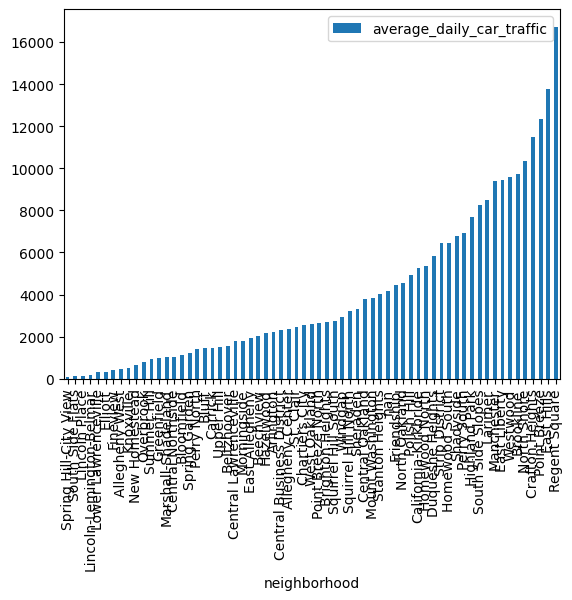

In [43]:
plt.figure(figsize=(30,8))
cleaner.sort_values(by="average_daily_car_traffic",ascending=True).plot(kind="bar", x="neighborhood",y ="average_daily_car_traffic", linewidth = 1)